# SVM

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
input_header = {"PROC_TRACEINFO" : "id",
                "OP070_V_1_angle_value": "angle_1",
                "OP090_SnapRingPeakForce_value" : "snap_ring_peak_force",
                "OP070_V_2_angle_value" : "angle_2",
                "OP120_Rodage_I_mesure_value" : "rodage_i",
                "OP090_SnapRingFinalStroke_value" : "snap_ring_final_stroke",
                "OP110_Vissage_M8_torque_value" : "vissage_m8_torque",
                "OP100_Capuchon_insertion_mesure" : "capuchon_insertion",
                "OP120_Rodage_U_mesure_value" : "rodage_u",
                "OP070_V_1_torque_value" : "torque_1",
                "OP090_StartLinePeakForce_value" : "start_line_peak_force",
                "OP110_Vissage_M8_angle_value" : "vissage_m8_angle",
                "OP090_SnapRingMidPointForce_val" : "snap_ring_midpoint_force",
                "OP070_V_2_torque_value" : "torque_2"}
output_header = {"PROC_TRACEINFO" : "id",
                 "Binar OP130_Resultat_Global_v" : "result"}

train_input = pd.read_csv("../data/train_inputs.csv", header=0).rename(columns=input_header)
train_output = pd.read_csv("../data/train_output.csv", header=0).rename(columns=output_header)

In [3]:
train_input_ = train_input[train_input.columns[~train_input.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_, train_output["result"], test_size = 0.3, random_state = 123)

## SVM

In [4]:
# Create model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Prediction
y_pred = svm_model.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9911154031868662

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


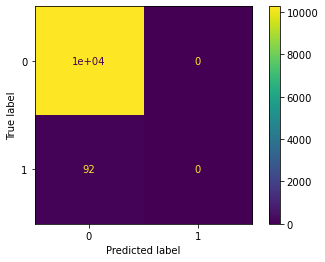

In [5]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

We observe the same issue, we had with the Naive Bayesian Classifier...  
Overfitting !!

## SVM with Balanced Classes

In [6]:
# Create model
svm_balanced_model = svm.SVC(class_weight="balanced")
svm_balanced_model.fit(X_train, y_train)

# Prediction
y_pred = svm_balanced_model.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.5531627233220666

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


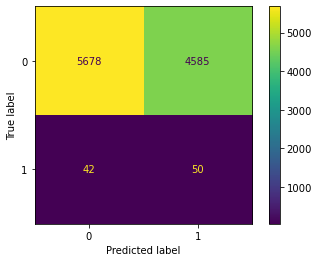

In [7]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(svm_balanced_model, X_test, y_test)
plt.show()

More realistic but less performant than the naive Bayes Classifier...

## Cross Validation

In [38]:
train_input_ = train_input[train_input.columns[~train_input.columns.isin(["id", "capuchon_insertion"])]]

svm_cross = svm.SVC(class_weight="balanced")

scores = cross_val_score(svm_cross, train_input_, train_output["result"], cv = 5)
scores

array([0.50818485, 0.52846588, 0.52238157, 0.5116616 , 0.53136318])